# Damped Wave Animation by Finite Difference Method


We want to compute a solution $u(x, t)$ satisfying the damped wave equation $\partial_{t}^{2}u + k\partial_{t}u = c^{2}\partial_{x}^{2}u$ with boundary conditions $u(x=0, t) = \phi(t)$ and $u(x=L, t) = 0$ and initial conditions $u(x, t=0) = f(x)$ and $\partial_{t}u(x, t=0) = g(x)$. 

We perform the computation by an **explicit finite difference method.** Writing $u_{j}^{l} = u(j\Delta x, l\Delta t)$, we take central different approximations to obtain the following discrete version of the damped wave equation:

$$ \frac{u_{j}^{l+1} - 2u_{j}^{l} + u_{j}^{l-1}}{(\Delta t)^{2}} + k\frac{u_{j}^{l+1} - u_{j}^{l-1}}{2\Delta t} = c^{2}\frac{u_{j+1}^{l} - 2u_{j}^{l} + u_{j-1}^{l}}{(\Delta x)^{2}} $$

which yields

$$ u_{j}^{l+1} = \left(1 + \frac{k\Delta t}{2}\right)^{-1}\left( \frac{c^2 \Delta t^2}{\Delta x^2}(u_{j+1}^{l} - 2u_{j}^{l} + u_{j-1}^{l}) + 2u_{j}^{l} - u_{j}^{l-1} + \frac{k\Delta t}{2}u_{j}^{l-1} \right). $$

The discretized boundary conditions are

$$ u_{0}^{l} = \phi(t^{l}) \qquad\text{and}\qquad u_{n}^{l} = 0 $$

where $n\Delta x = L$. Lastly, the initial conditions are

$$ u_{j}^{0} = f(x_{j}) \qquad\text{and}\qquad u_{j}^{1} = g(x_{j})\Delta t + f(x_{j}). $$

The latter condition can be obtained from the approximate condition $g(x_{j}) = (u_{j}^{1} - u_{j}^{0})/\Delta t + O(h)$. 


When choosing our space and time gridspacing, we ought to adhere to the **CFL condition**

$$ c\frac{\Delta t}{\Delta x} \le 1. $$

Otherwise, instabilities will appear. Moreover, to counter numerical dispersion, we will choose our gridspacing so that both sides of the above inequality are equal. 

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# constants
L = 3
c = 1
k = 0.2
t_total = 20
fps_play = 30 # dt = 1/fps_play
nx = int(L / (c / fps_play)) # CFL condition with equality

# define arrays
x_array = np.linspace(0, L, nx)
t_array = np.arange(0, t_total, 1/fps_play)

dx = x_array[1] - x_array[0]
dt = t_array[1] - t_array[0]

In [3]:
# left define boundary function
def phi(t):
    sigma = 5
    return np.exp(-sigma * (t - 1)**2)

# initial condition functions
def f(x):
    return 0

def g(x):
    return 0

In [4]:
# solution grid
u_x_t = np.zeros((len(x_array), len(t_array)))

# initial conditions
u_x_t[:, 0] = f(x_array)
u_x_t[:, 1] = g(x_array)*dt + f(x_array)

# boundary conditions
u_x_t[0, :] = phi(t_array)

In [5]:
# explicit time-evolution
factor1 = (1 + k*dt/2)**-1
factor2 = (c*dt/dx)**2
factor3 = k*dt/2
for l in range(1, len(t_array)-1):
    u_x_t[1:-1, l+1] = factor1 * (
        factor2 * (u_x_t[2:, l] - 2*u_x_t[1:-1, l] + u_x_t[:-2, l])
        + 2*u_x_t[1:-1, l] - u_x_t[1:-1, l-1] + factor3 * u_x_t[1:-1, l-1]
    )

progress = 1.00           

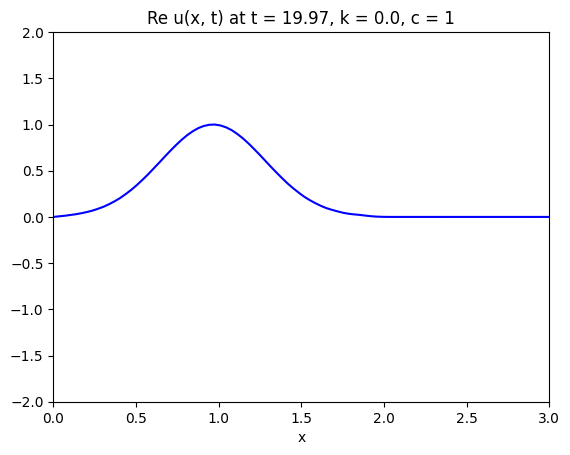

In [6]:
# initial plot
fig, ax = plt.subplots()
initial_data = u_x_t[:, 0]
line, = ax.plot(x_array, np.real(initial_data), color='blue')
ax.set_xlim(0, L)
ax.set_ylim(-2, 2)
ax.set_title(f'Re u(x, t) at t = 0.00, k = {k}, c = {c}')
ax.set_xlabel('x')
ax.set_ylabel('')

# update function for animation
def update(index):
    y_data = np.real(u_x_t[:, index])
    line.set_ydata(np.real(y_data))

    t_curr = t_array[index]
    prog = index/len(t_array)
    ax.set_title(f'Re u(x, t) at t = {t_curr:.2f}, k = {k}, c = {c}')
    
    print(f"\rprogress = {prog:.2f}           ", end = "")
    return line,

# create animation
ani = FuncAnimation(fig, update, frames=range(len(t_array)), blit=True)

# save the animation (requires ffmpeg installed)
ani.save('gaussianwave_animation2_fdm.mp4', fps=fps_play, extra_args=['-vcodec', 'libx264'])
plt.show()